Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Importing the Dataset

In [2]:
dataset =pd.read_excel('MRT Prediction Database for ICMIME.xlsx')

### Deal with Outliers and High Leverage Points

In [3]:
# Step 1: Remove Outliers using Z-scores
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Only numeric columns
    outliers = (z_scores > threshold).any(axis=1)
    print(f"Number of outliers detected: {outliers.sum()}")
    return df[~outliers]

# Step 2: Apply outlier and high leverage point removal
response_column = 'Globe temperature (°C) [MRT]'  # Replace with the actual target column name in your dataset
dataset_clean = remove_outliers_zscore(dataset)

# Step 3: Dataset is now ready for any machine learning model
print(f"Shape of dataset after cleaning: {dataset_clean.shape}")

Number of outliers detected: 694
Shape of dataset after cleaning: (21033, 4)


### Printing Maximum and Minimum Values of Every Variables

In [4]:
# Print the max and min value of every variable after removing outliers
max_values = dataset_clean.max()  # Maximum values of each column
min_values = dataset_clean.min()  # Minimum values of each column

# Printing the results
print("Maximum values of each variable after removing outliers:")
print(max_values)

print("\nMinimum values of each variable after removing outliers:")
print(min_values)


Maximum values of each variable after removing outliers:
Air temperature (°C)            36.40
Radiant temperature (°C)        36.90
Air velocity (m/s)               0.93
Globe temperature (°C) [MRT]    36.60
dtype: float64

Minimum values of each variable after removing outliers:
Air temperature (°C)            12.2
Radiant temperature (°C)        12.4
Air velocity (m/s)               0.0
Globe temperature (°C) [MRT]    12.4
dtype: float64


### Cleaned Dataset for Training and Testing

In [5]:

X = dataset_clean.iloc[:, :-1]
y = dataset_clean.iloc[:, -1]

### Spliting the Dataset into Training and Test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the Multiple Linear RegressionModel on the Training Set

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [8]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [9]:

comparison_df = pd.DataFrame({
    'True Value': y_test,
    'Predicted Value': y_pred
})
print(comparison_df.to_string(index=False))

 True Value  Predicted Value
       18.2        18.466359
       22.7        22.741470
       23.6        23.605290
       25.7        25.448378
       31.9        31.920679
       24.3        24.206795
       24.2        24.057093
       31.4        31.540701
       27.3        27.137894
       22.7        22.599351
       24.8        24.687213
       26.4        26.396609
       14.3        14.463395
       24.1        24.048667
       17.8        17.279474
       21.2        20.848258
       21.9        21.813856
       30.0        29.975830
       23.5        23.464047
       27.3        27.342243
       21.6        21.181486
       29.2        28.999605
       23.7        23.753495
       30.0        30.015964
       21.5        21.404180
       22.9        22.690933
       29.4        29.400581
       27.8        27.777698
       24.8        24.807648
       31.6        31.360408
       22.7        22.553130
       26.8        26.828225
       23.8        23.884111
       23.2   

Printing Co-efficients and Equation

In [10]:
# Extract coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Construct the regression equation with actual variable names
variable_names = X.columns
equation = f"Globe Temperature (°C) = {intercept:.3f}"

for var_name, coef in zip(variable_names, coefficients):
    equation += f" + ({coef:.3f}) * {var_name}"

# Print the regression equation
print("\nRegression Equation:")
print(equation)

# Print the coefficients and intercept
print("\nCoefficients:")
for var_name, coef in zip(variable_names, coefficients):
    print(f"Coefficient of {var_name}: {coef:.3f}")

print(f"Intercept: {intercept:.3f}")


Regression Equation:
Globe Temperature (°C) = -0.031 + (0.540) * Air temperature (°C) + (0.462) * Radiant temperature (°C) + (-0.174) * Air velocity (m/s)

Coefficients:
Coefficient of Air temperature (°C): 0.540
Coefficient of Radiant temperature (°C): 0.462
Coefficient of Air velocity (m/s): -0.174
Intercept: -0.031


### Errors Measurement of Train Set

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
train_r_squared = r2_score(y_train, y_pred_train)

print(f"\nMean Squared Error (MSE) of Train Set: {train_mse:.5f}")
print(f"Mean Absolute Error (MAE) of Train Set: {train_mae:.5f}")
print(f"Mean Absolute Percentage Error (MAPE) of Train Set: {train_mape:.5f}")
print(f"R-squared (R²) of Train Set: {train_r_squared:.5f}")


Mean Squared Error (MSE) of Train Set: 0.08064
Mean Absolute Error (MAE) of Train Set: 0.14782
Mean Absolute Percentage Error (MAPE) of Train Set: 0.00614
R-squared (R²) of Train Set: 0.99396


### Errors Measurement of Test Set

In [12]:
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_r_squared = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE) of Test Set: {test_mse:.5f}")
print(f"Mean Absolute Error (MAE) of Test Set: {test_mae:.5f}")
print(f"Mean Absolute Percentage Error (MAPE) of Test Set: {test_mape:.5f}")
print(f"R-squared (R²) of Test Set: {test_r_squared:.5f}")


Mean Squared Error (MSE) of Test Set: 0.08190
Mean Absolute Error (MAE) of Test Set: 0.14577
Mean Absolute Percentage Error (MAPE) of Test Set: 0.00605
R-squared (R²) of Test Set: 0.99389


### Model Evaluation

In [13]:
# Printing MSE for Training and Test Sets
print(f"Training Set - Mean Squared Error (MSE): {train_mse:.5f}")
print(f"Test Set - Mean Squared Error (MSE): {test_mse:.5f}\n")

# Commenting on Model Fit based on MSE
if abs(train_mse - test_mse) < 0.1:  # Threshold for difference between train and test MSE
    print("Model has a Good Fit.")
elif test_mse > train_mse:
    print("Model is Overfitting.")
else:
    print("Model is Underfitting.")


Training Set - Mean Squared Error (MSE): 0.08064
Test Set - Mean Squared Error (MSE): 0.08190

Model has a Good Fit.


## Plotting

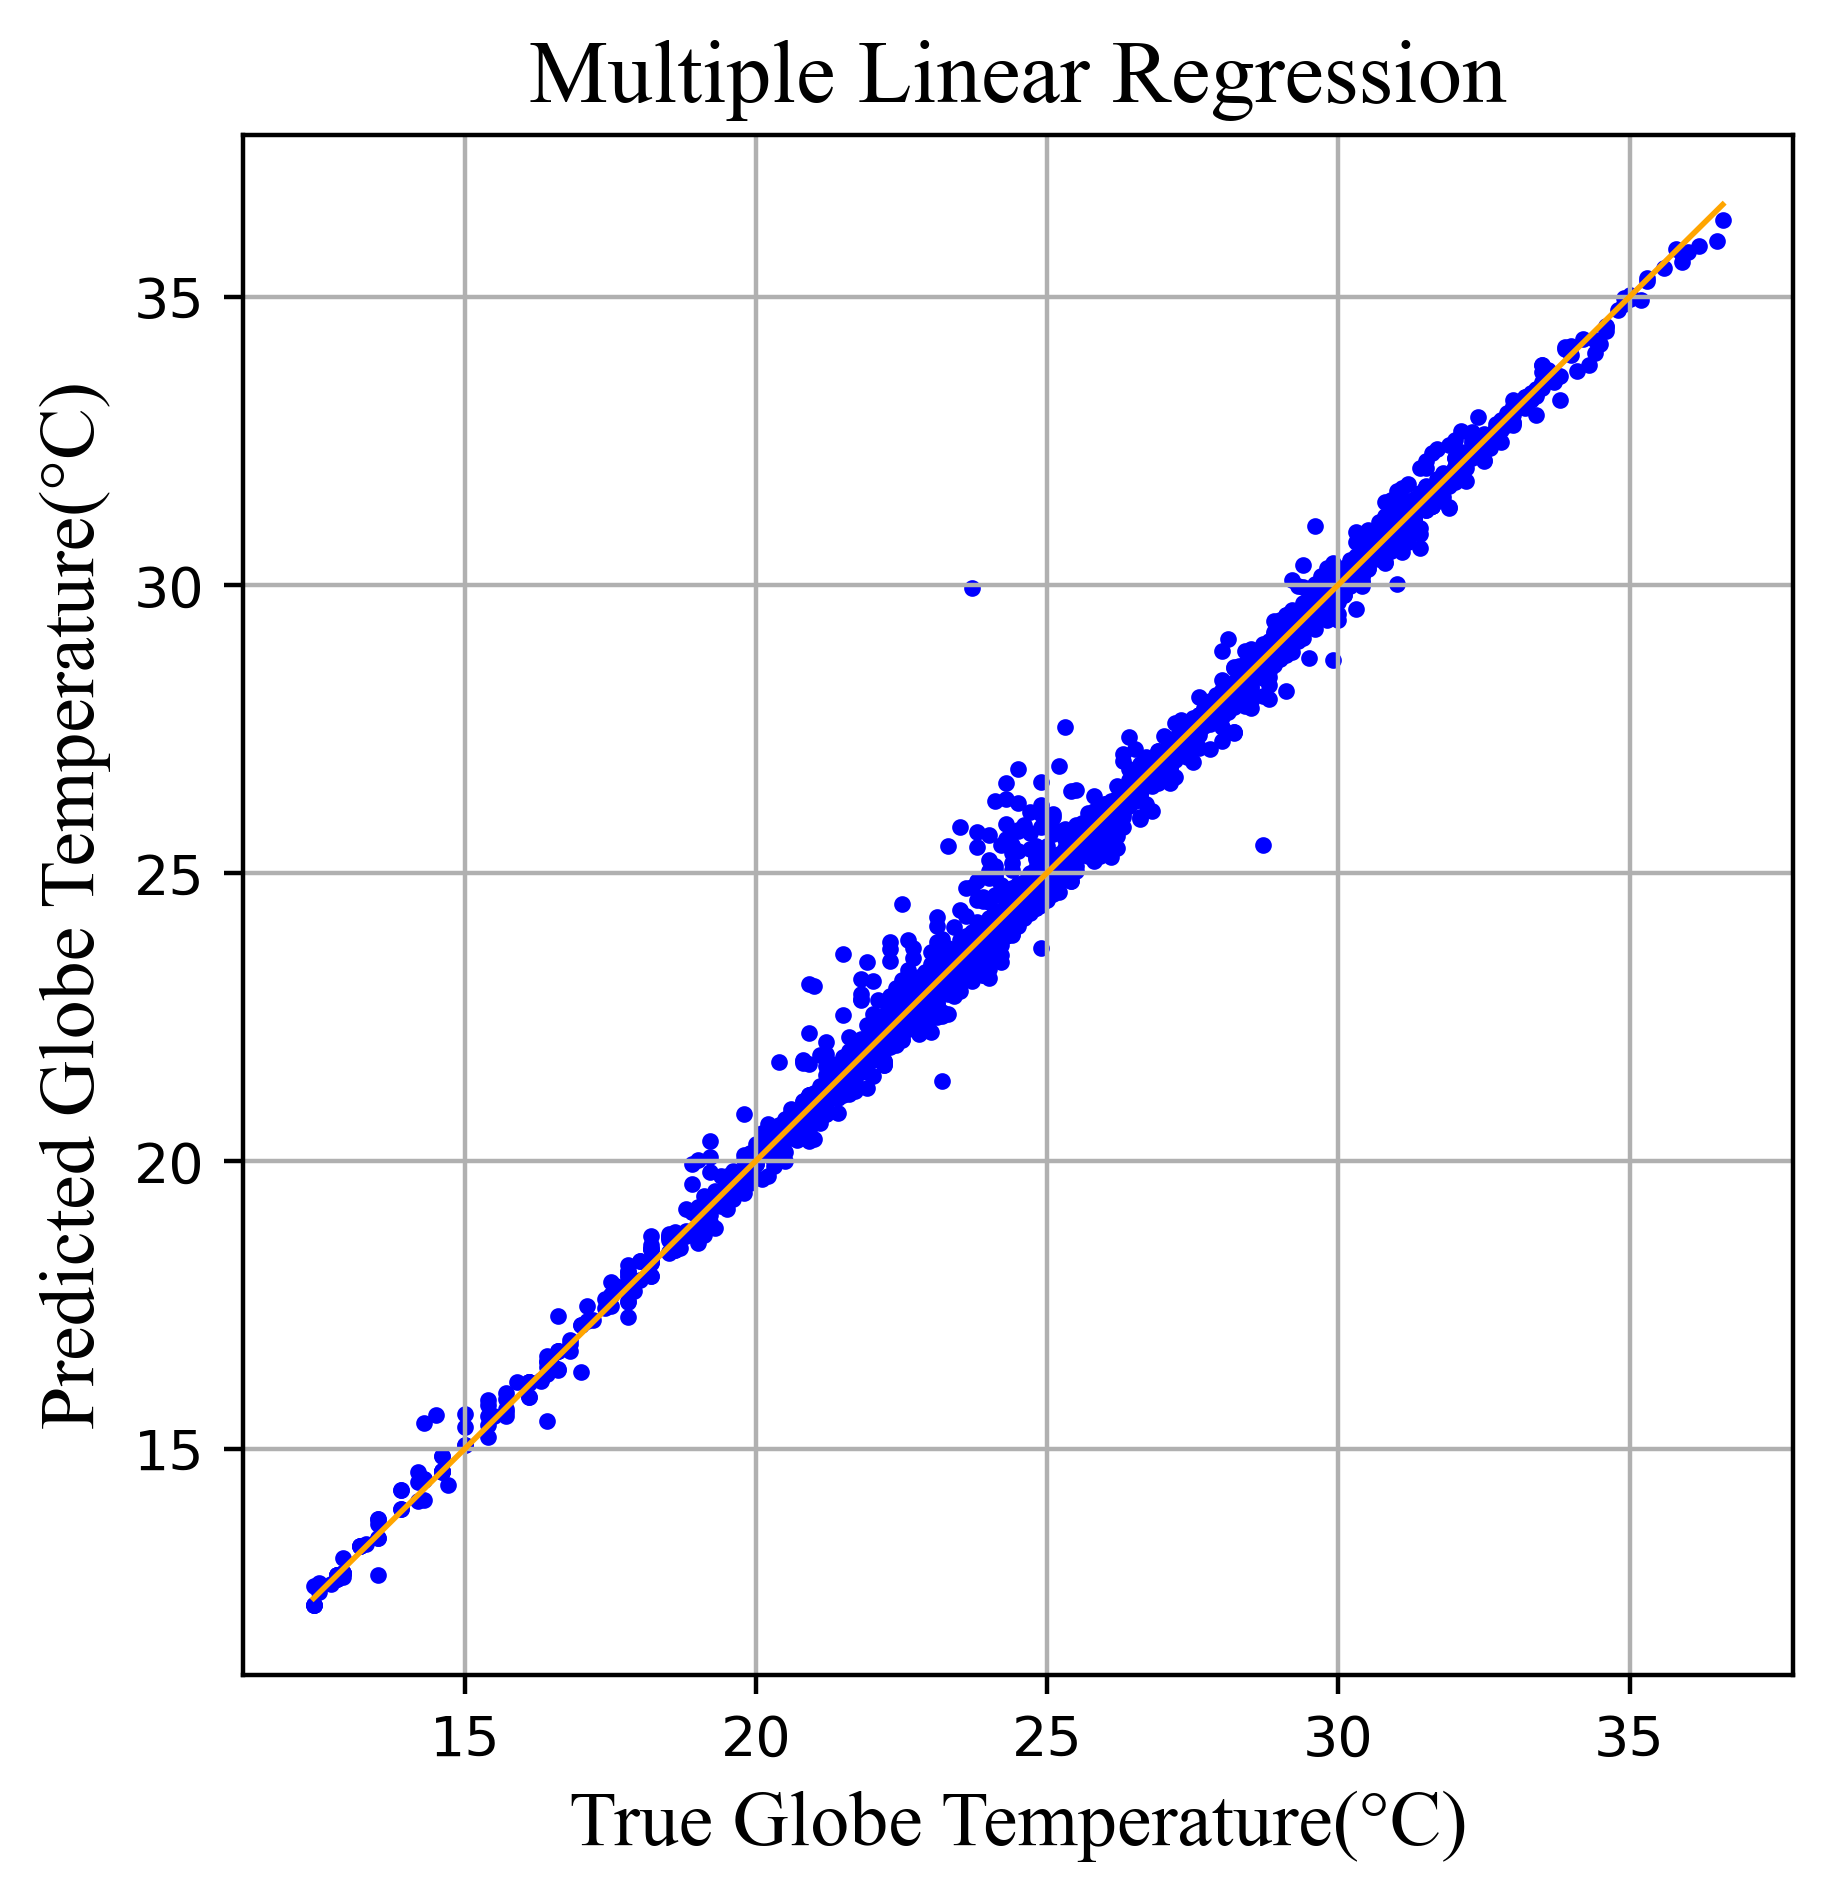

In [14]:
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.scatter(y_test, y_pred, color='blue',s=4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', lw=1)
plt.title('Multiple Linear Regression',fontname='Times New Roman', fontsize=16)
plt.xlabel('True Globe Temperature(°C)',fontname='Times New Roman', fontsize=14)
plt.ylabel('Predicted Globe Temperature(°C)',fontname='Times New Roman', fontsize=14)
plt.grid(True)
plt.show()

### Effect of Features on Output Variable

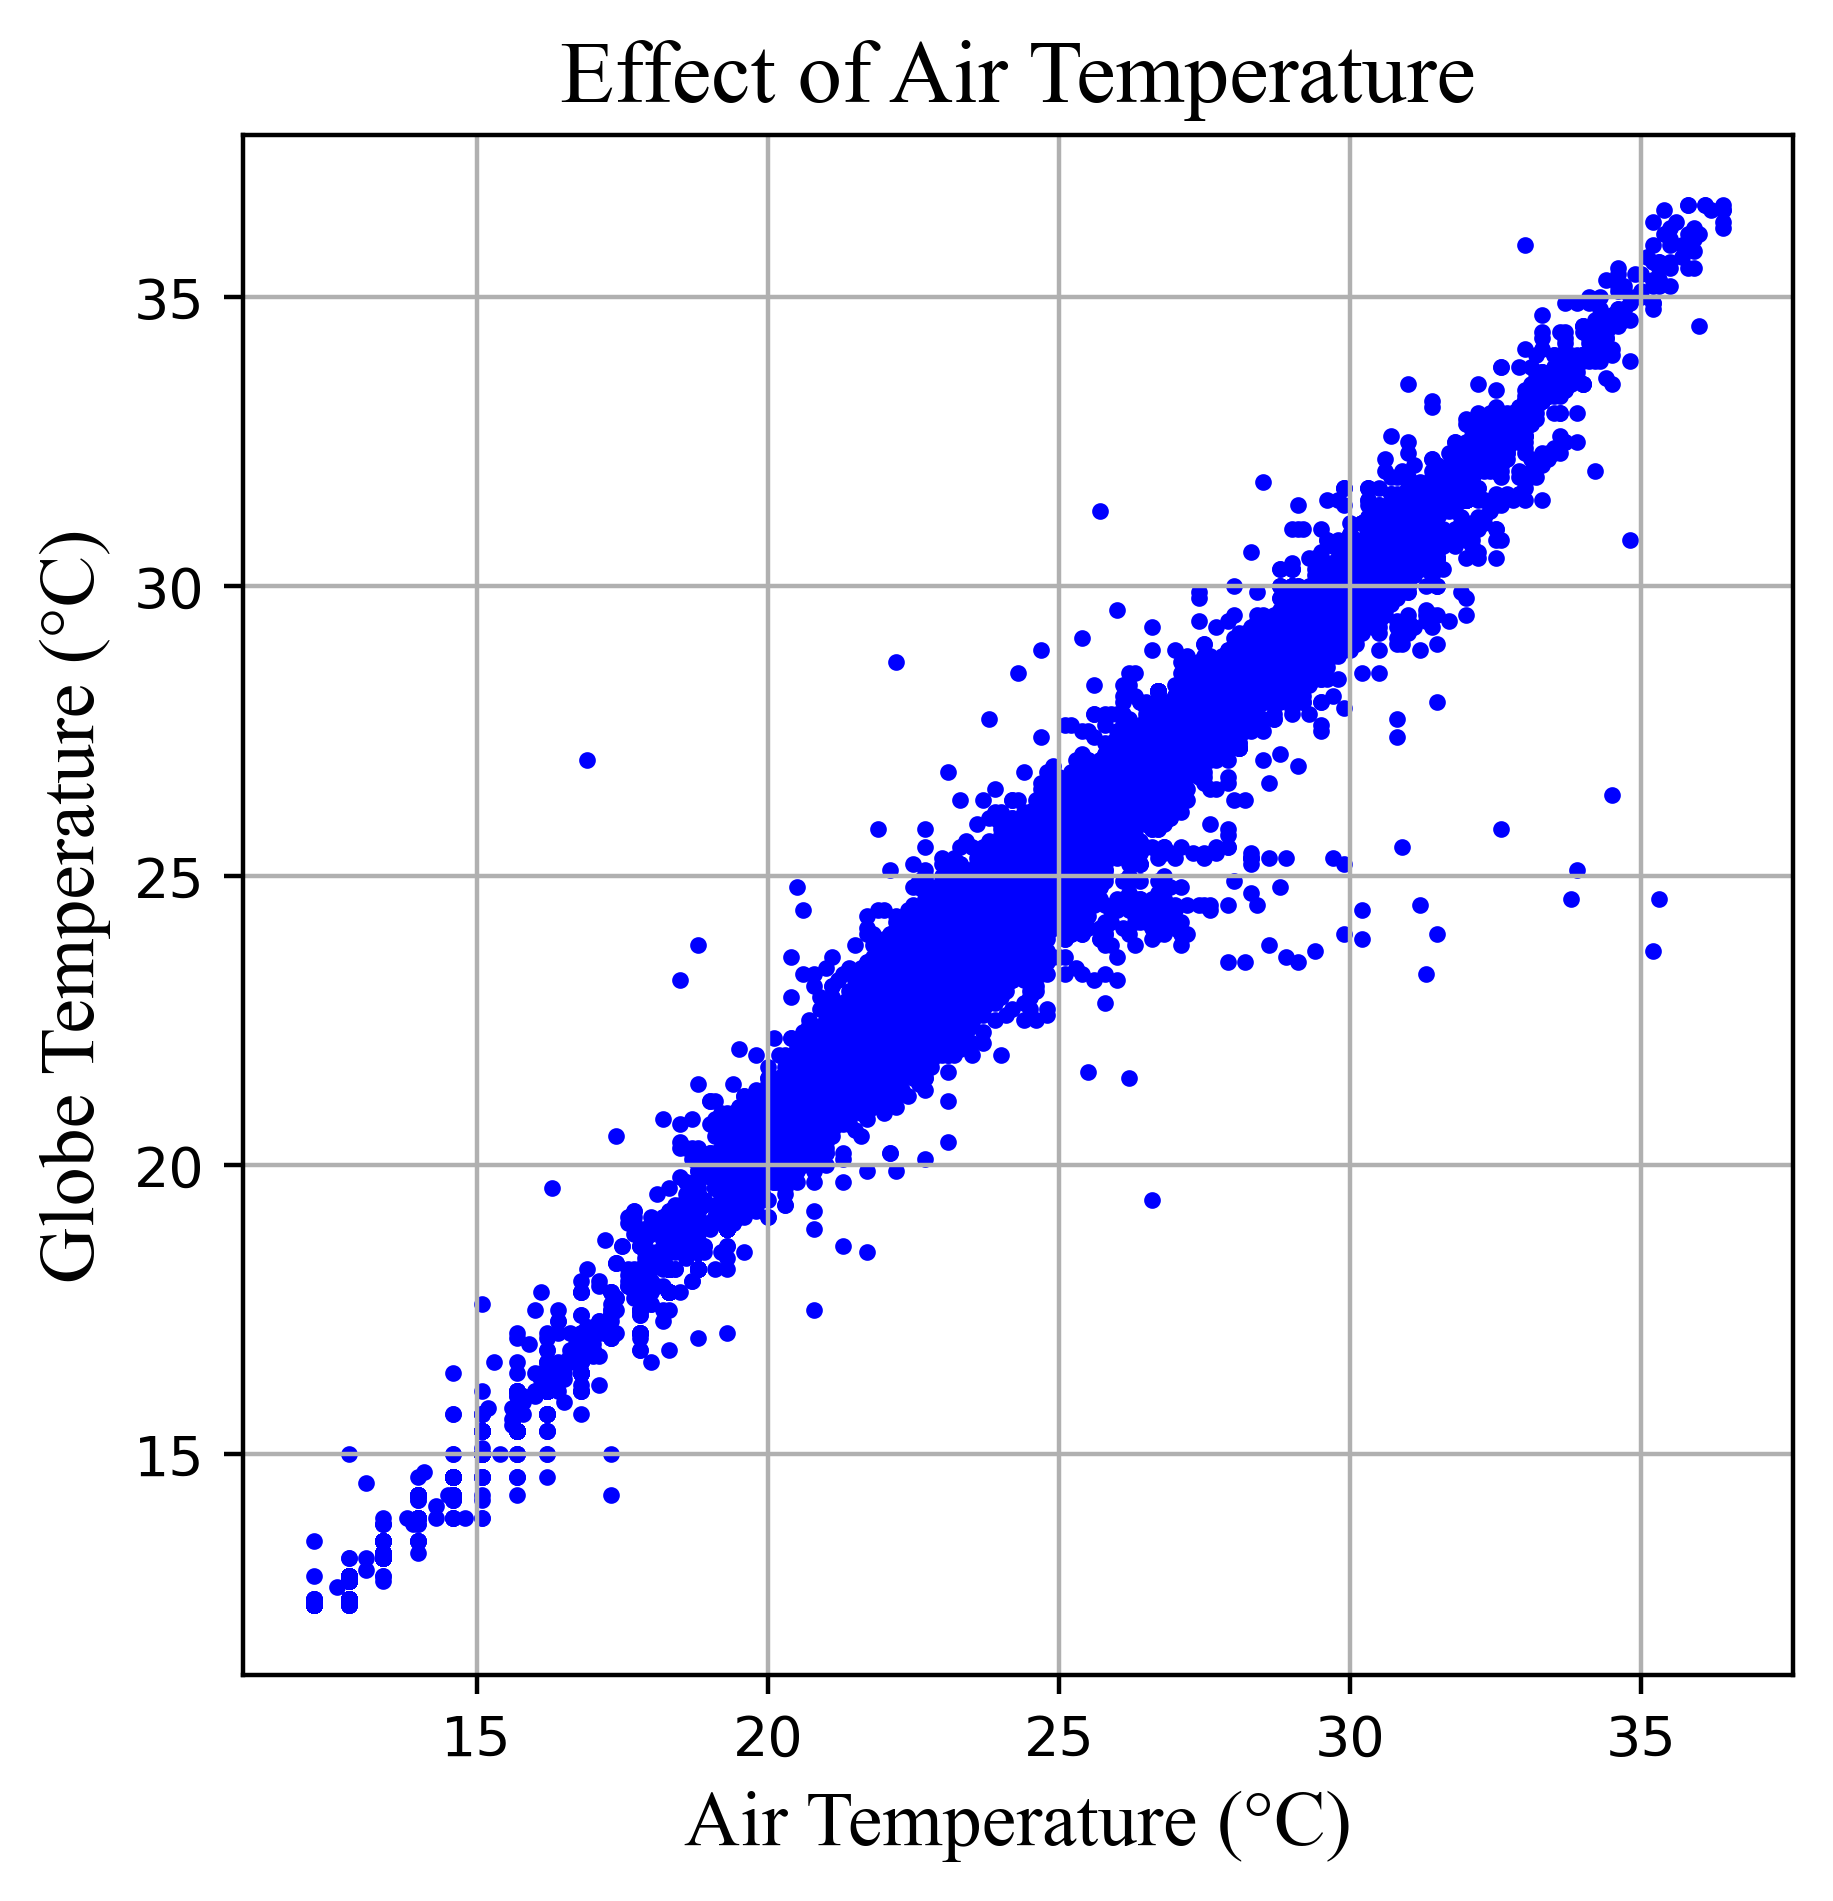

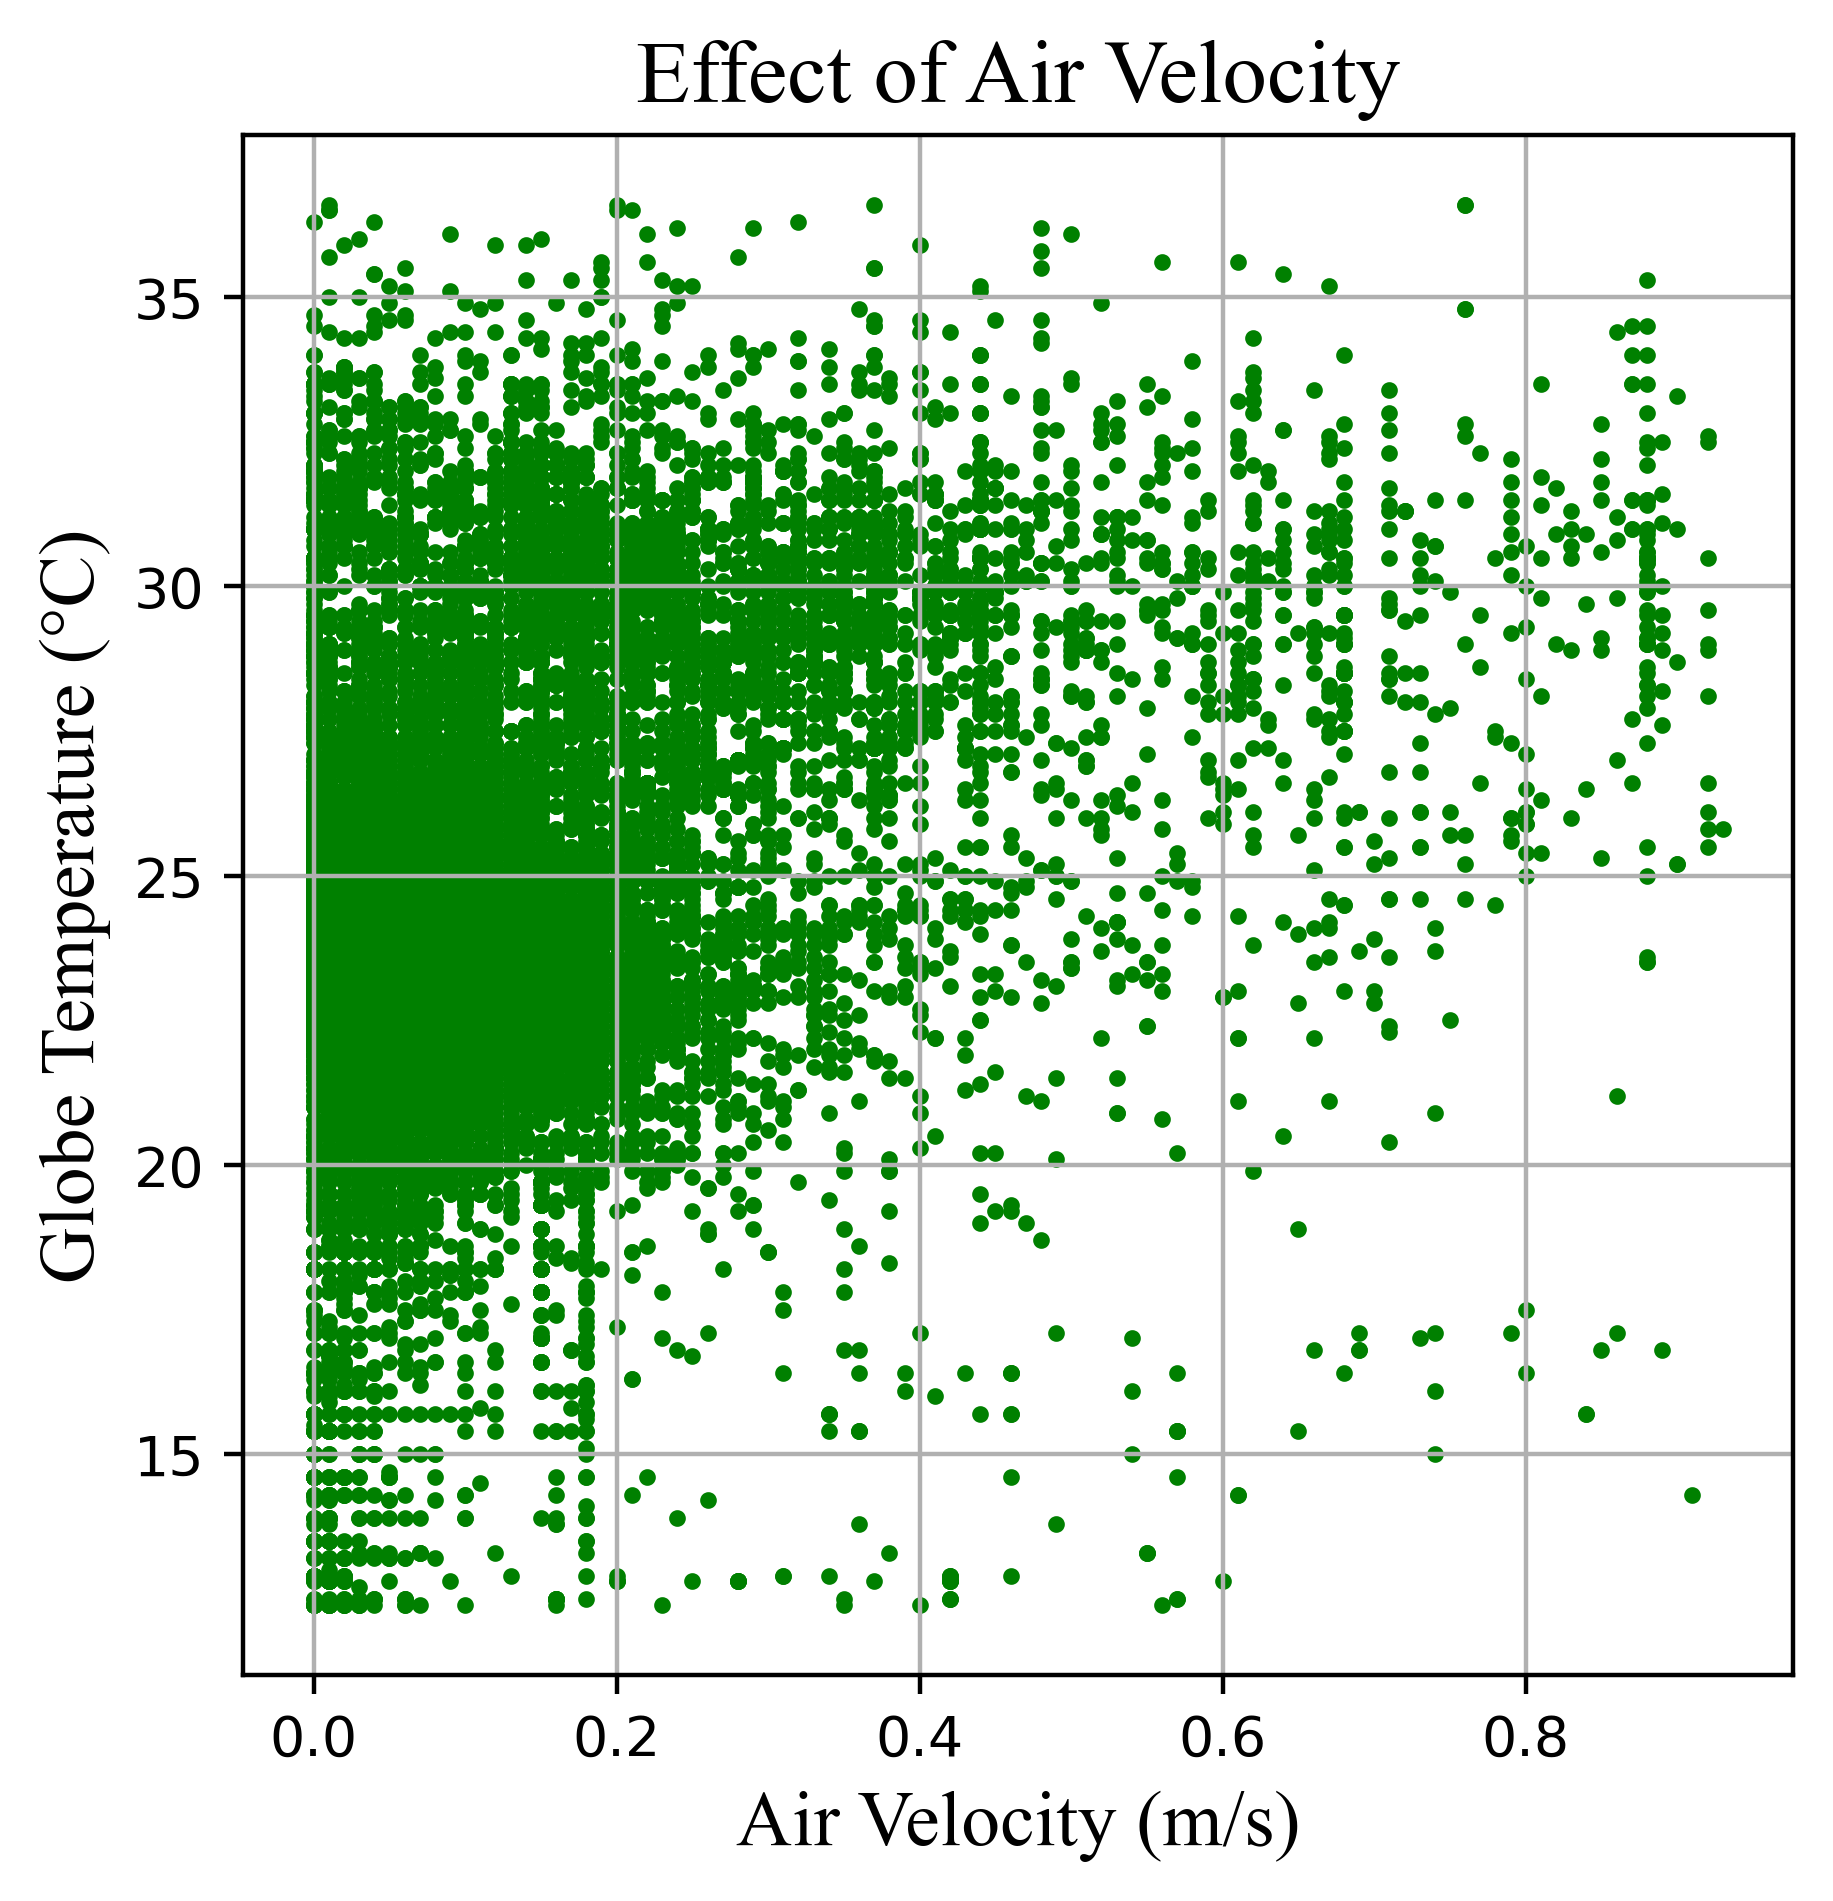

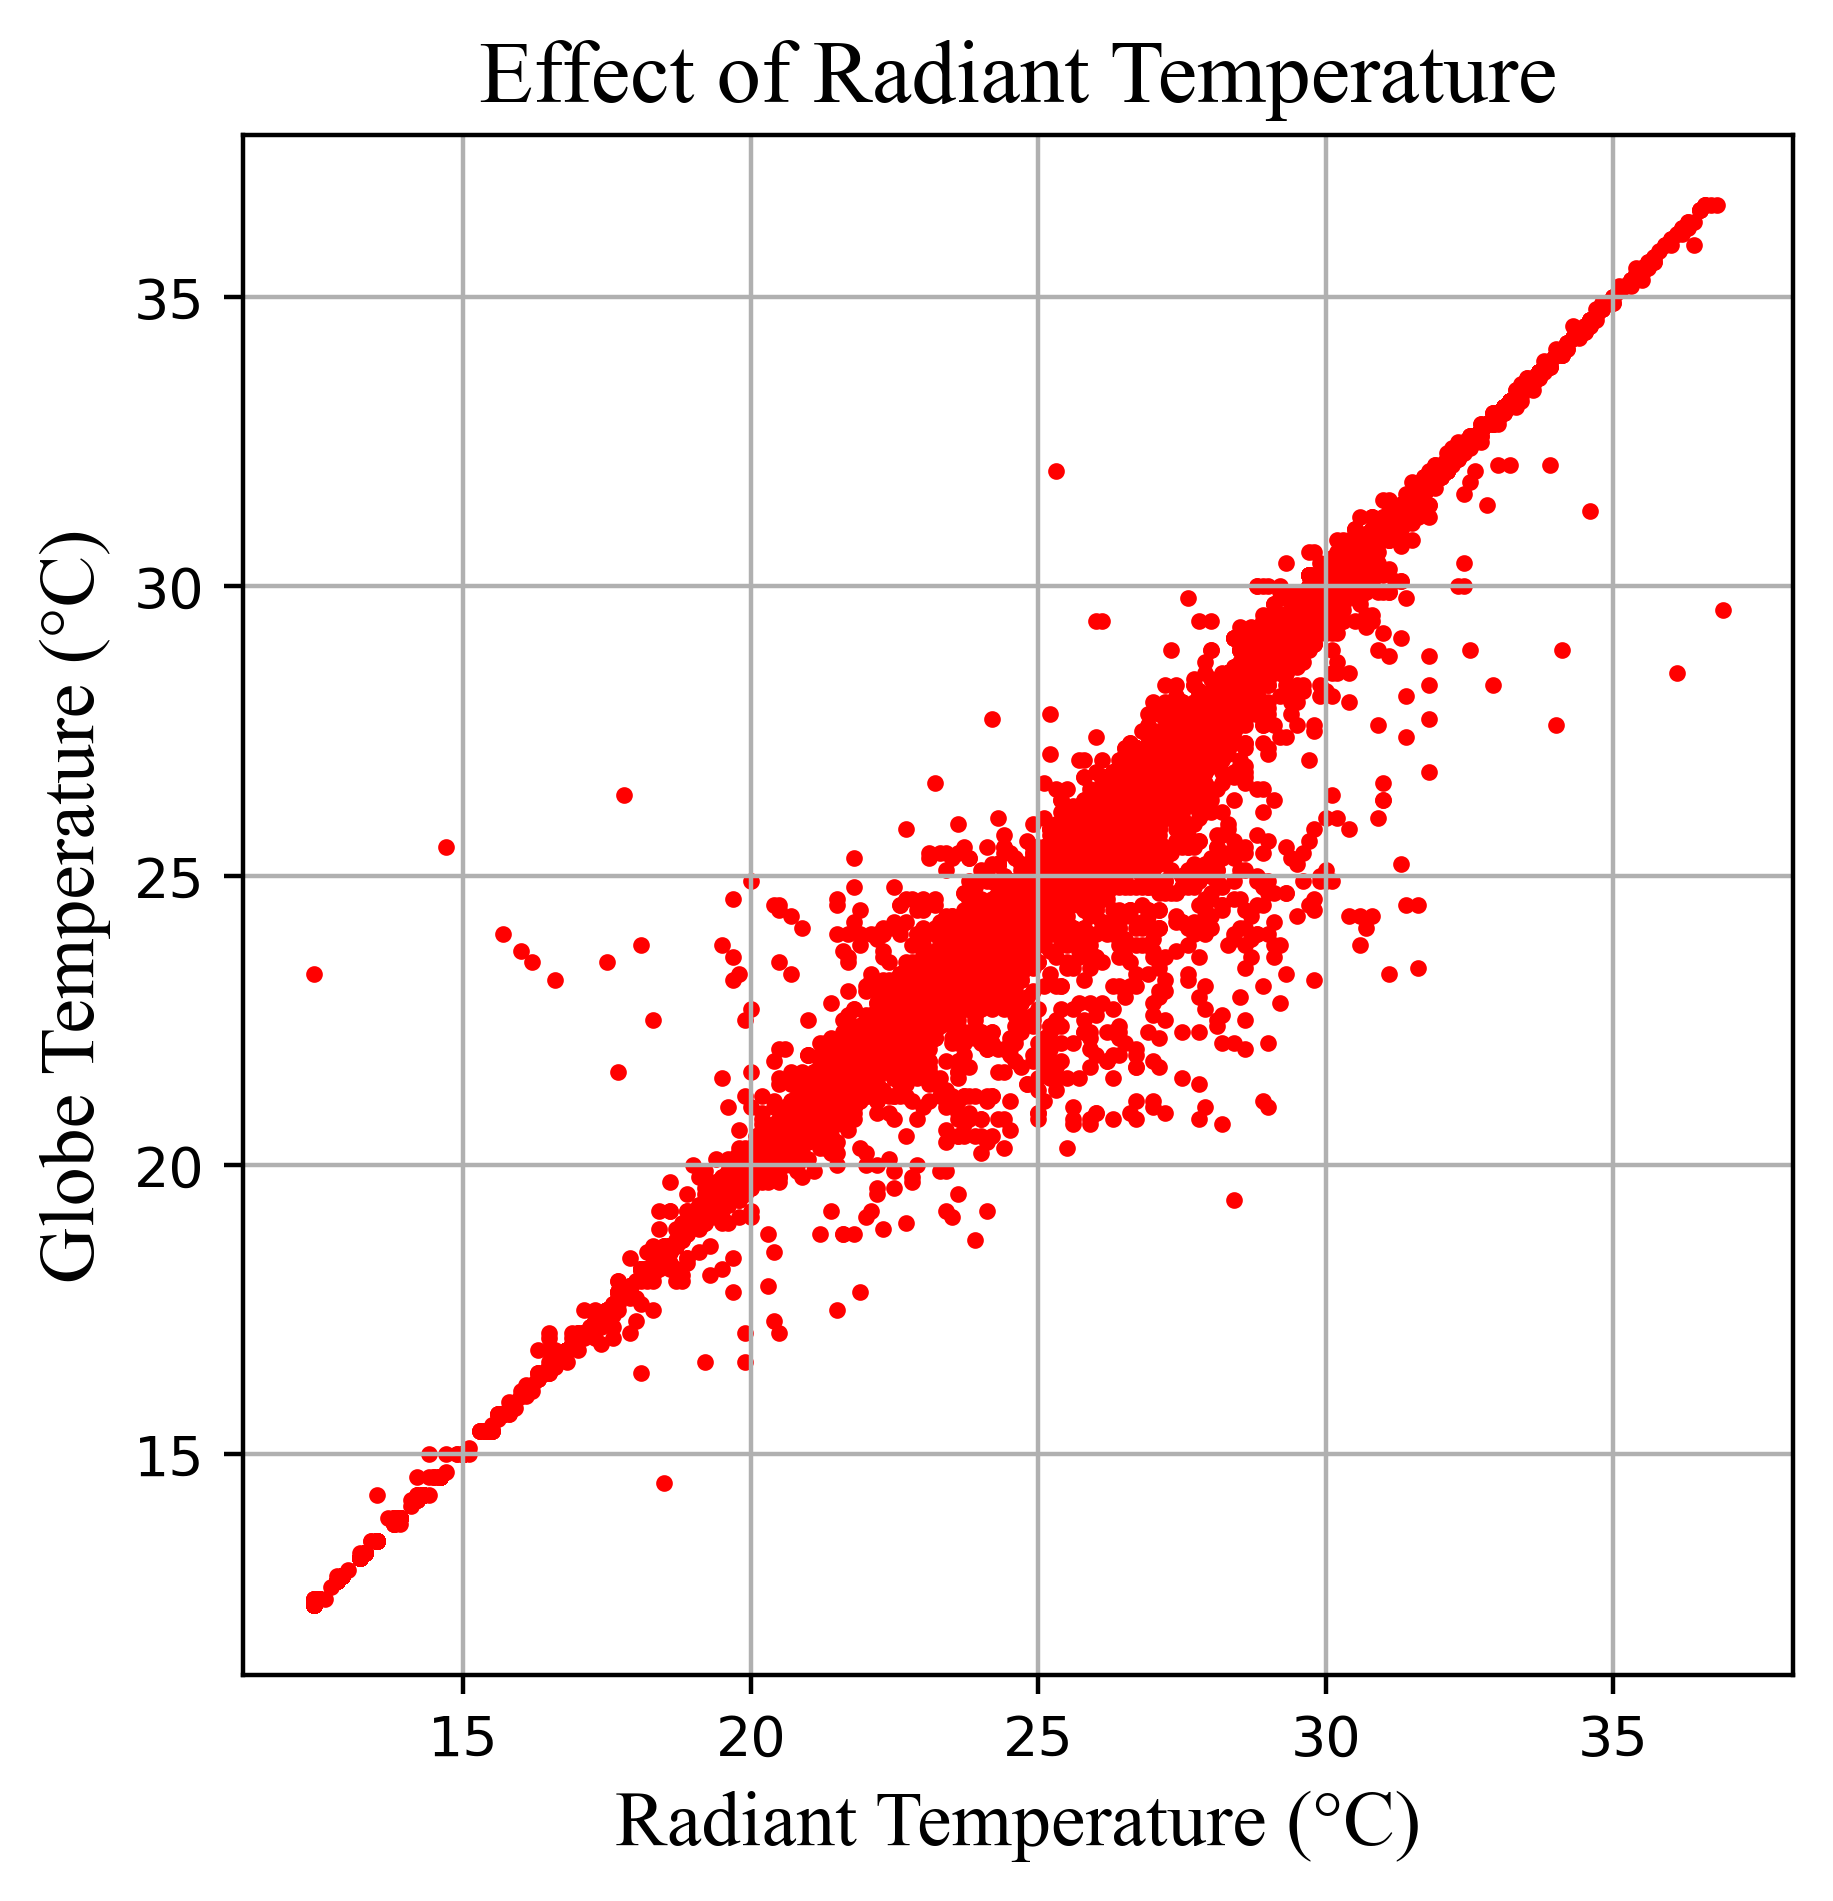

In [15]:
# Plot 1: Air Temperature vs. Globe Temperature
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.scatter(X['Air temperature (°C)'], y, color='blue', s=4)
plt.title('Effect of Air Temperature', fontname='Times New Roman', fontsize=16)
plt.xlabel('Air Temperature (°C)', fontname='Times New Roman', fontsize=14)
plt.ylabel('Globe Temperature (°C)', fontname='Times New Roman', fontsize=14)
plt.grid(True)
plt.show()

# Plot 2: Air Velocity vs. Globe Temperature
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.scatter(X['Air velocity (m/s)'], y, color='green', s=4)
plt.title('Effect of Air Velocity', fontname='Times New Roman', fontsize=16)
plt.xlabel('Air Velocity (m/s)', fontname='Times New Roman', fontsize=14)
plt.ylabel('Globe Temperature (°C)', fontname='Times New Roman', fontsize=14)
plt.grid(True)
plt.show()

# Plot 3: Radiant Temperature vs. Globe Temperature
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.scatter(X['Radiant temperature (°C)'], y, color='red', s=4)
plt.title('Effect of Radiant Temperature', fontname='Times New Roman', fontsize=16)
plt.xlabel('Radiant Temperature (°C)', fontname='Times New Roman', fontsize=14)
plt.ylabel('Globe Temperature (°C)', fontname='Times New Roman', fontsize=14)
plt.grid(True)
plt.show()

